# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
df_ta = pd.read_csv(
    "C:/Users/mctal/Documents/DSBA materials/7 Unsupervised Learning/stock_data.csv"
)

<IPython.core.display.Javascript object>

In [3]:
df_ta.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


<IPython.core.display.Javascript object>

- Dataset loaded properly

In [4]:
df_ta.shape

(340, 15)

<IPython.core.display.Javascript object>

- There are 340 rows and 15 columns

In [5]:
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

- There are 11 numerical and 4 object data types
- All 340 rows are complete

In [6]:
df_ta.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate values

In [7]:
df_ta.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

- There are no missing values in the dataset

In [8]:
df_ta.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


<IPython.core.display.Javascript object>

- All markets have a unique Ticker symbol and Security
- There are 11 unique GICS sectors, Industrials sector has the most markets of 53 under it
- There are 104 unique GICS sub industry, Oil and Gas Exploration and Production has the most markets of 16
- Current price of markets range from 4.5 to 1274.94 dollars
- Price change ranges from -47.12 to 55.051, indicating losses and gains in the market
- Volatility in the market is relatively low from 0.7 to 4.5
- ROE of markets is modearate with mean and median values of  39 and 15 with some having as high ass 27. Maximum was at 917
- Cash ratio ranges from 0 to 958
- Net cash flow, Net income and Earnings per share ranged from negative to positive values indicating losses and gains in the market
- P/E Ratio shows the markets made some earnings with positive values
- P/B Ratio shows some markets made both earnings and losses during trading compared to their book value

In [9]:
# Creating a copy of dataset
df = df_ta.copy()

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [11]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Univariate Analysis

**GICS Sector**

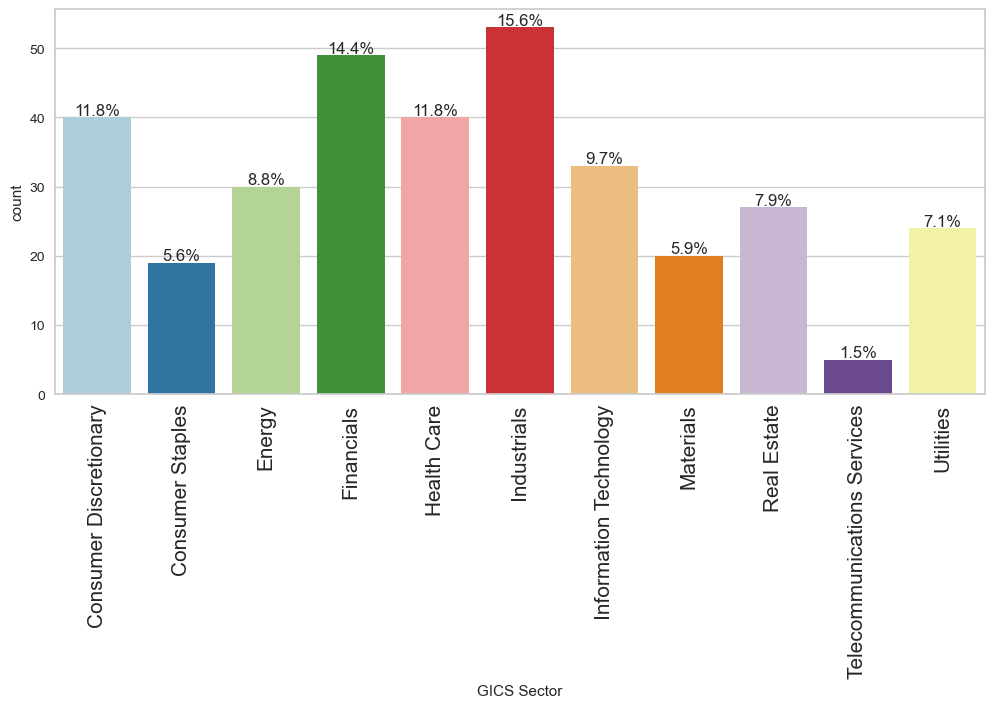

<IPython.core.display.Javascript object>

In [12]:
labeled_barplot(df, "GICS Sector", perc=True)

- Industrials sector has the number of companies trading in the market with 15.6% next to Financials with 14.4%
- Telecommnications Services has the least with 1.5% of companies trading

**GICS Sub Industry**

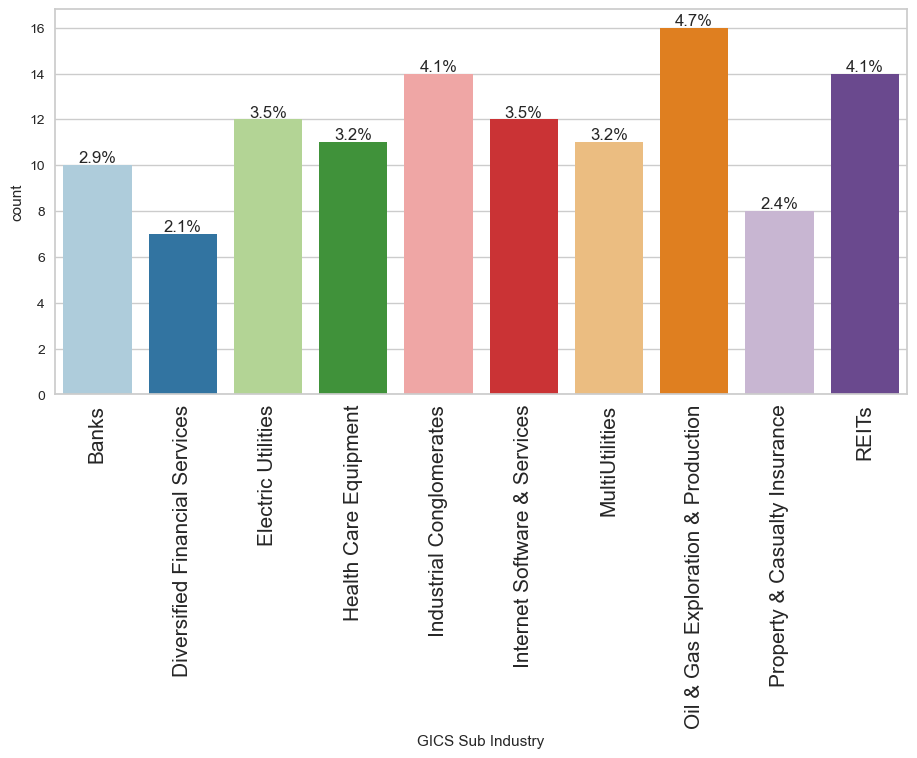

<IPython.core.display.Javascript object>

In [13]:
labeled_barplot(df, "GICS Sub Industry", perc=True, n=10)

- Oil and Gas companies are the most in the market with 4.7% represented next to REITs and Industrial Conglomerates represnting 4.1% each.

**Current Price**

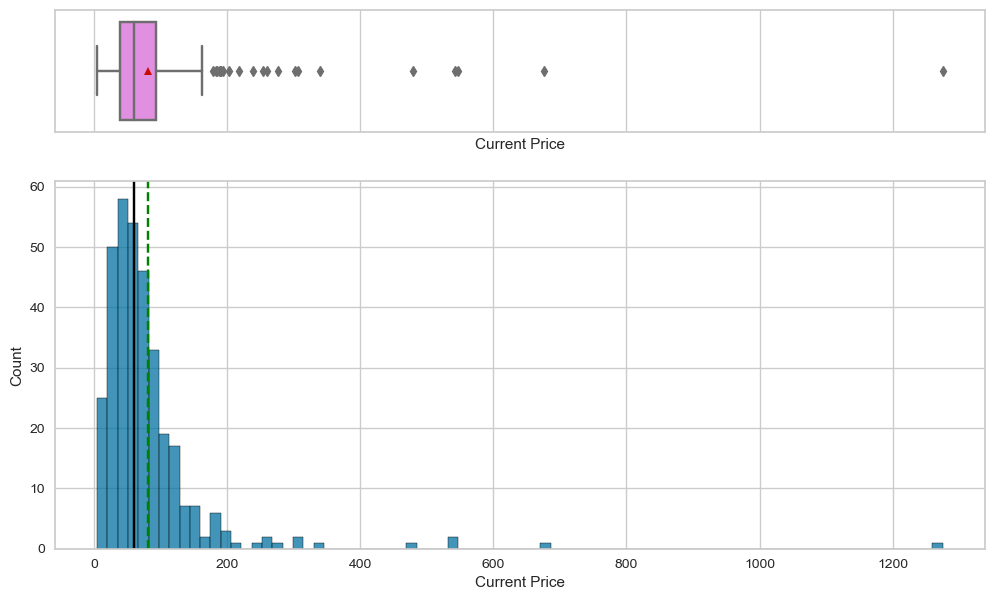

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df, "Current Price")

- Most of the share prices range between 4 to 170 dollars
- Distribution is right skewed with some outliers
- The highest share price is at about 1,270 dollars

**Price Change**

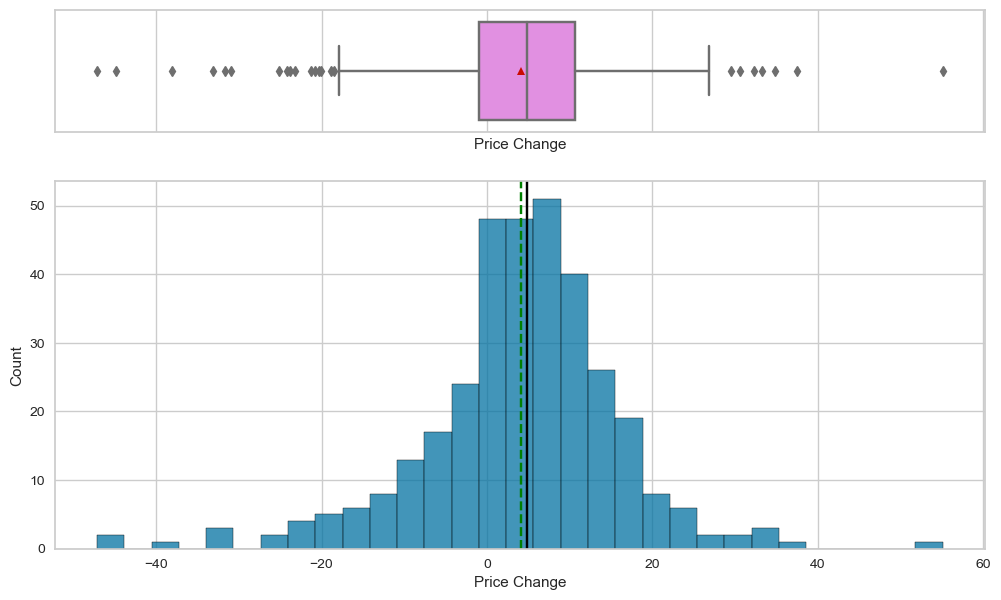

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "Price Change")

- Price changes is a normal distribution with some outliers
- Changes range from negative values (losses) to positve values (gains)

**Volatility**

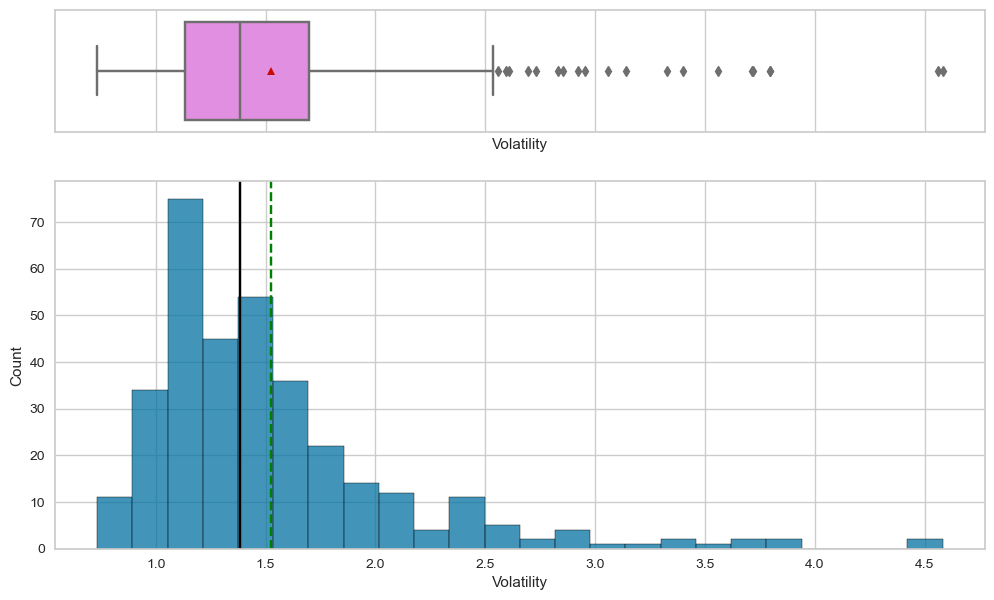

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, "Volatility")

- Volatility of the price is right skewed
- Changes are within 0.5 to 4

**ROE**

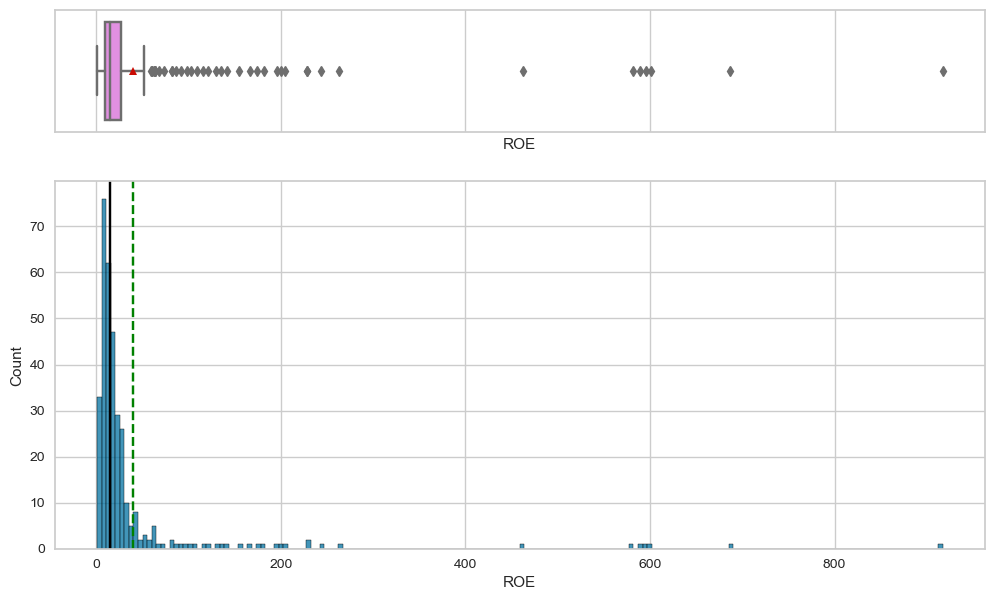

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "ROE")

- ROE is highly right skewed with outliers

**Cash Ratio**

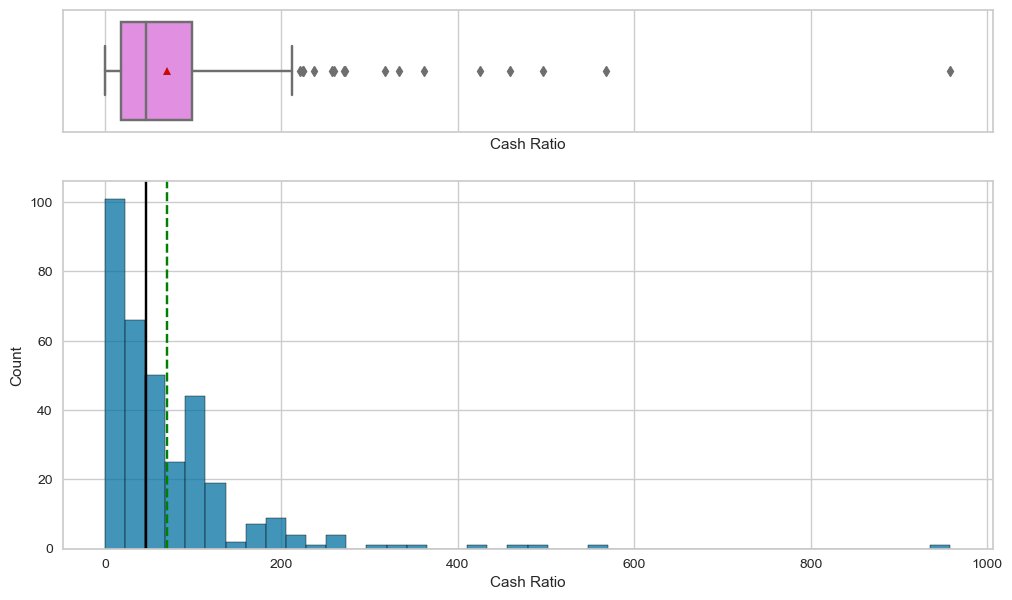

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "Cash Ratio")

- Cash ratio is right skewed with some outliers

**Net Cash Flow**

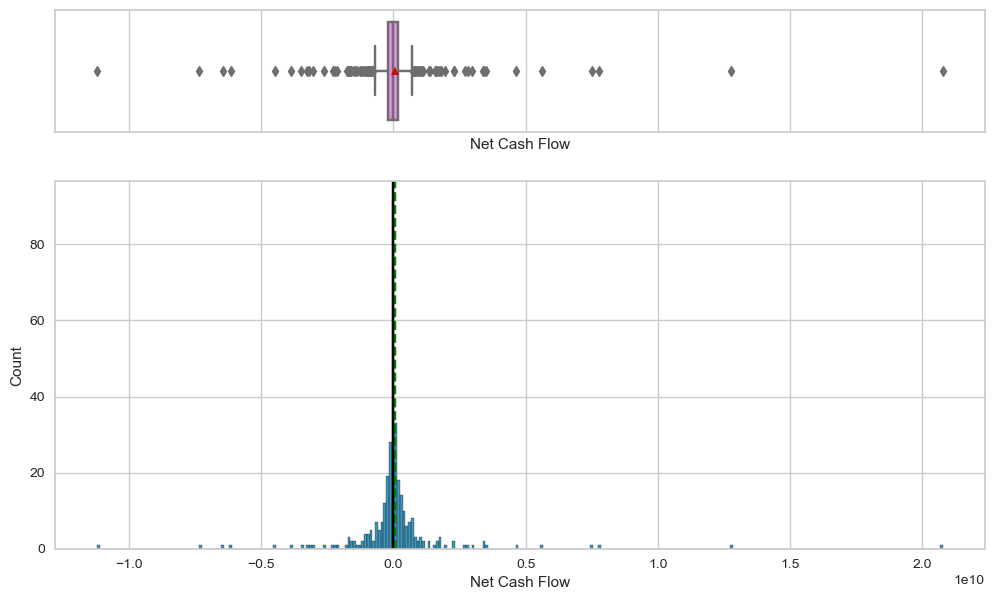

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "Net Cash Flow")

- Net cash flow is normal distribution with outliers on both sides
- Cash flow ranges from negatives (losses) to positive (gains) values

**Net Income**

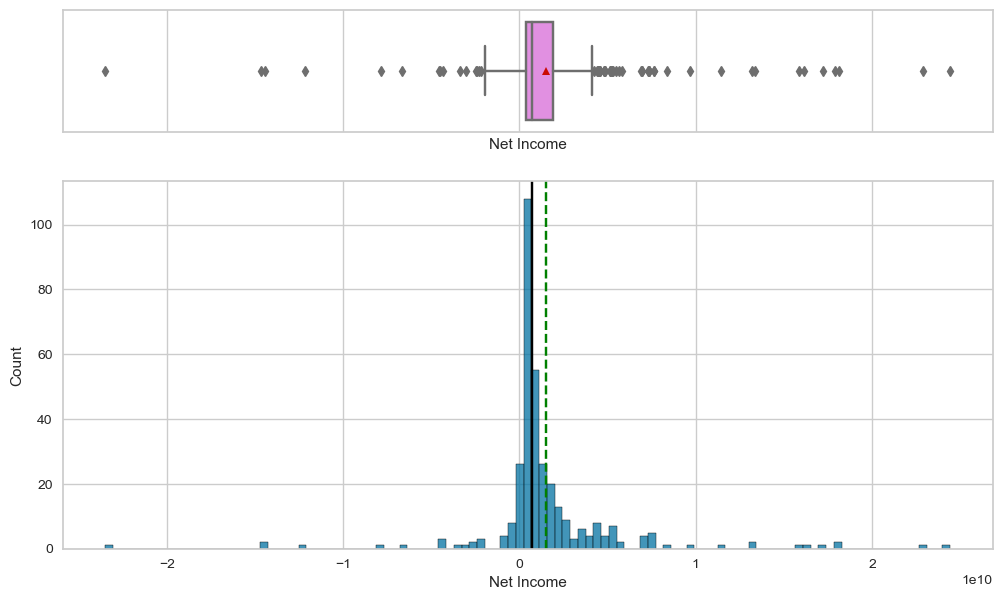

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "Net Income")

- Net income is slightly right skewed with outliers
- The distribution shows there was gains and losses in some tradings

**Earnings Per Share**

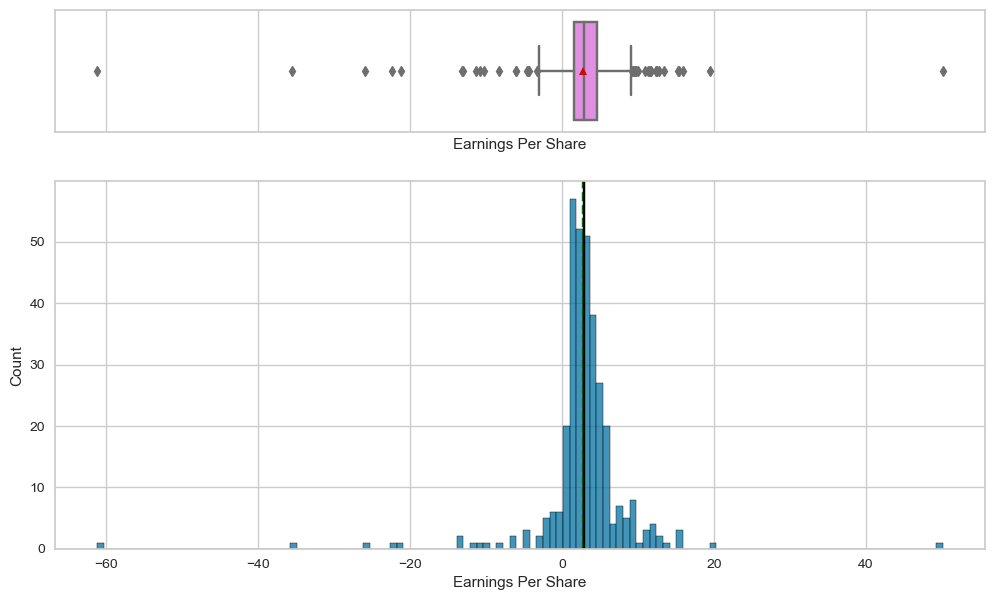

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "Earnings Per Share")

- The distribution is slightly left skewed with some outliers
- There were more losses (negative values) in the earnings per share than gains (positive values)

**Estimated Shares Outstanding**

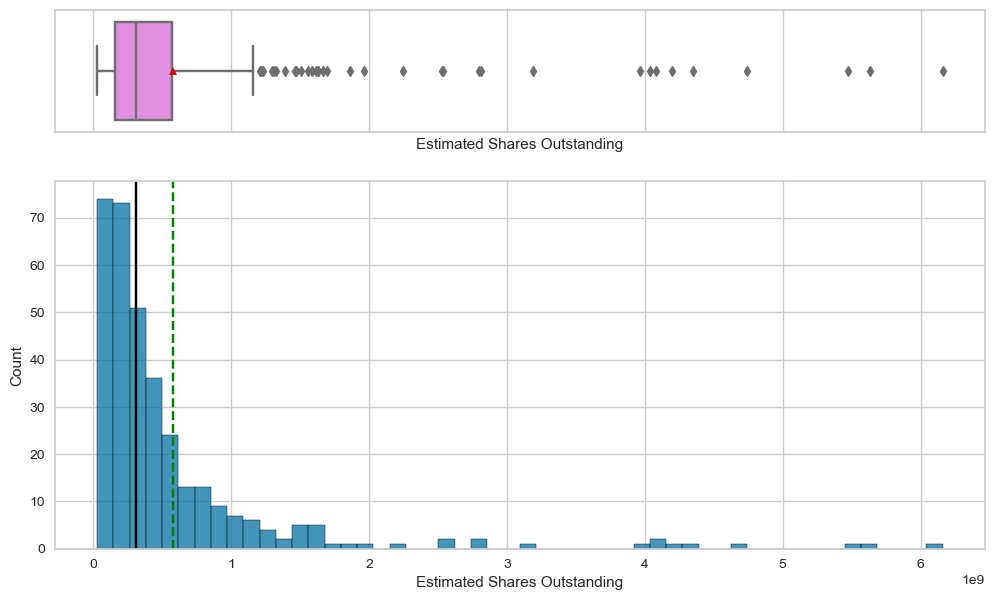

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "Estimated Shares Outstanding")

- Distribution is right skewed skewed with outliers

**P/E Ratio**

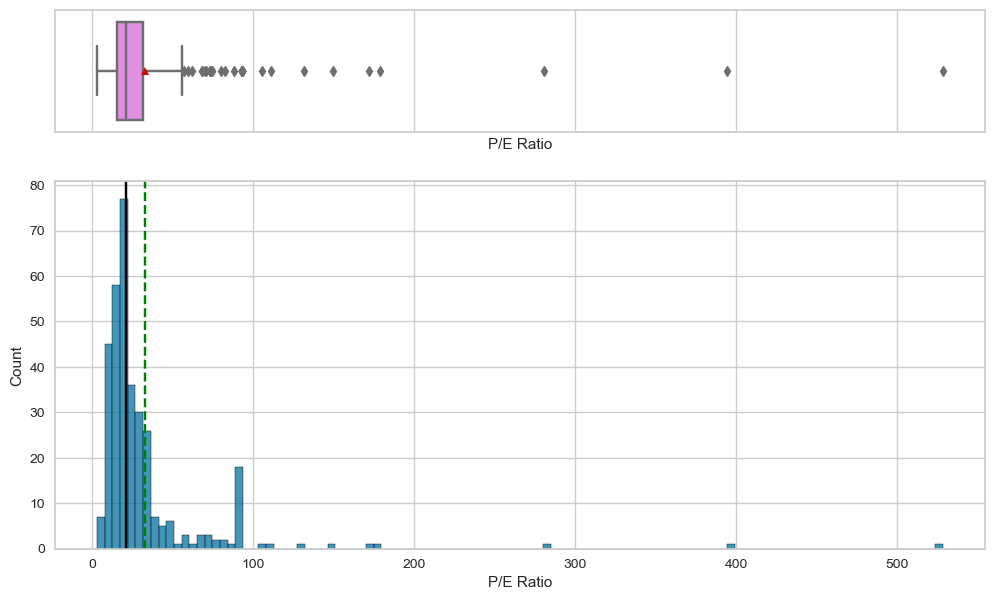

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "P/E Ratio")

- Chart is right skewed with outliers

**P/B Ratio**

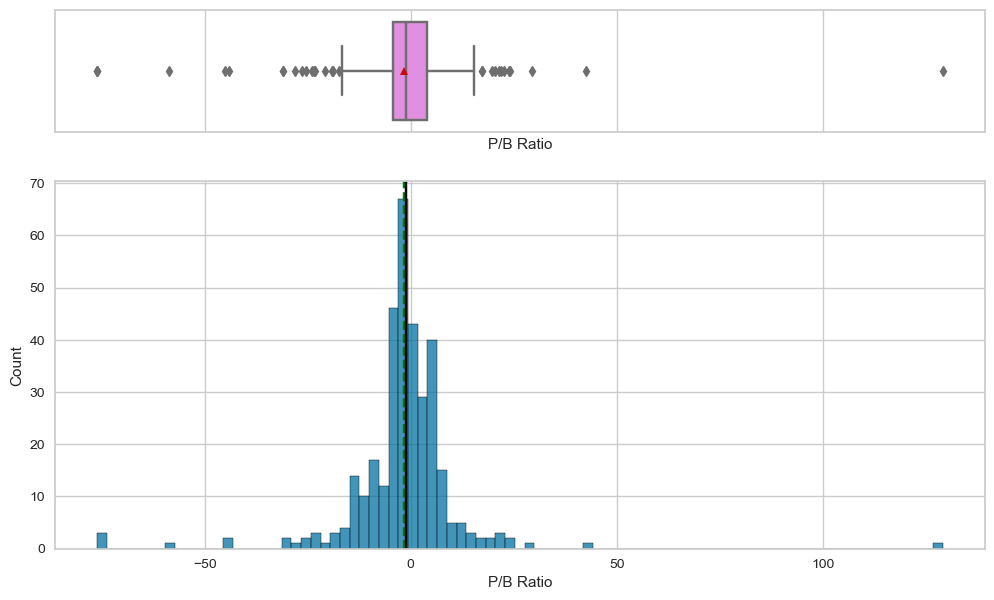

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df, "P/B Ratio")

- Distribution is normal with some outliers
- There are losses and gains in the shares

### Bivariate Analysis

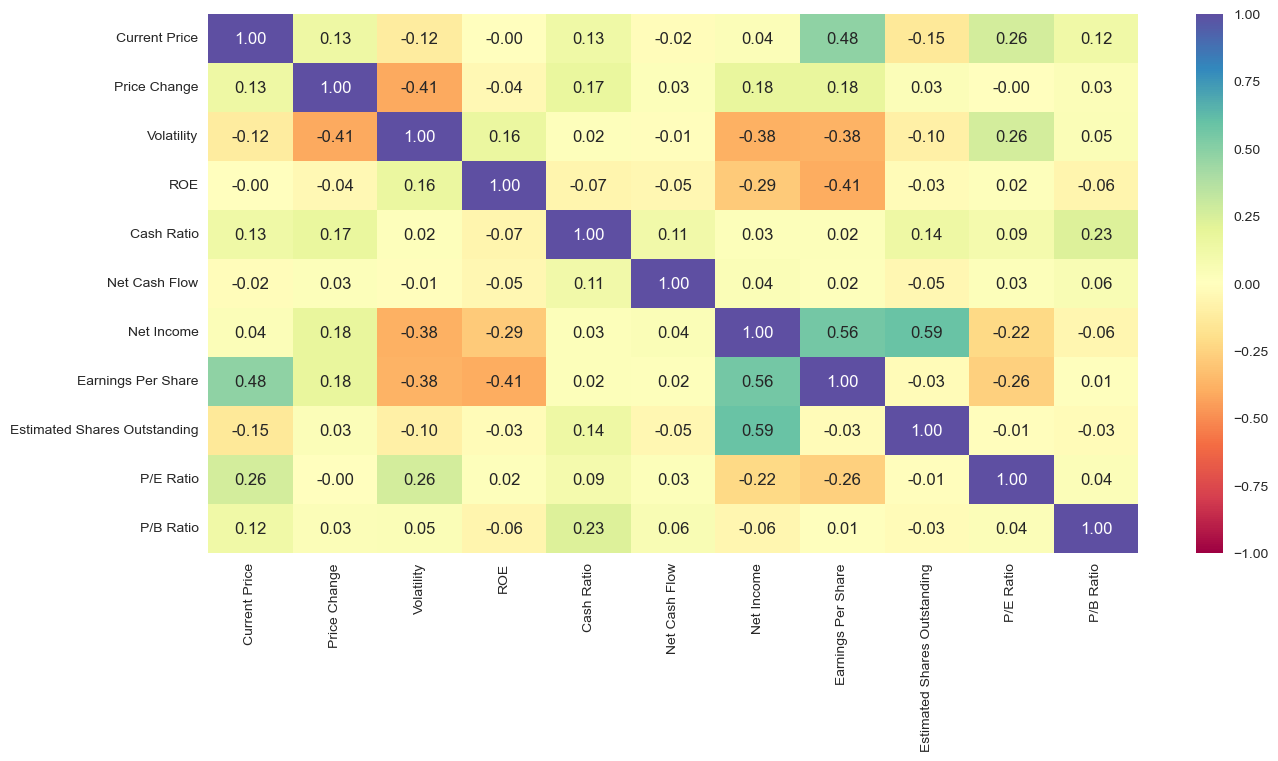

<IPython.core.display.Javascript object>

In [25]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Net income and Estimated shares outstanding are correlated followed by Net Income and Earnings per share which shows that the profitability of any shares is determined volume of shares in a company and the profits made per share
- Current price and Earnings per share are moderately correlated, meaning the more profitable the share the higher the price of the share

**Q1: What does the distribution of stock prices look like?**

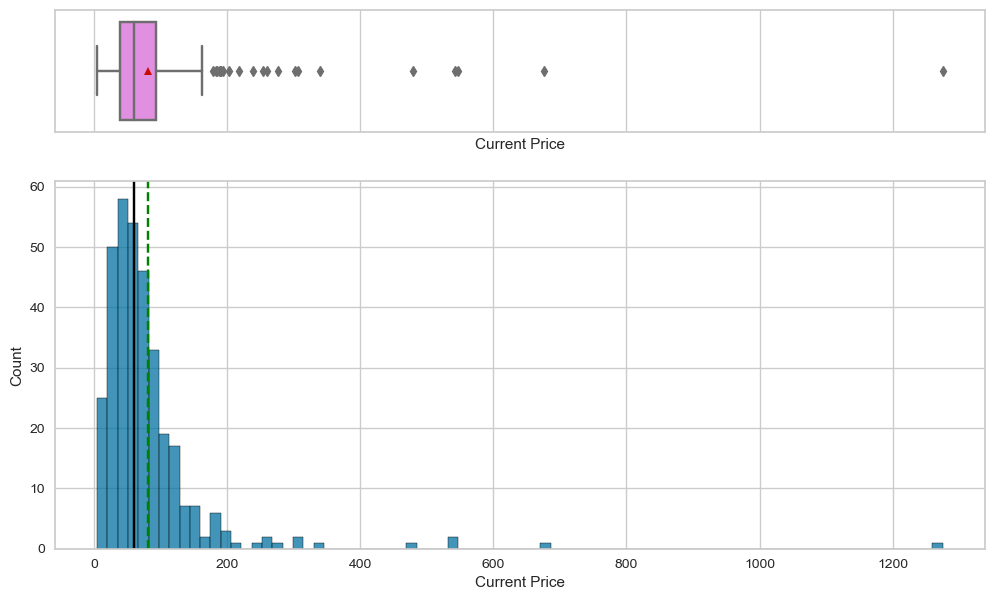

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(df, "Current Price")

- The distribuution is right skewed, most of the prices are within 4 to 200 dollars
- Some outliers are present within 300 to 1,200 dollars

**Q2: The stocks of which economic sector have seen the maximum price increase on average?**

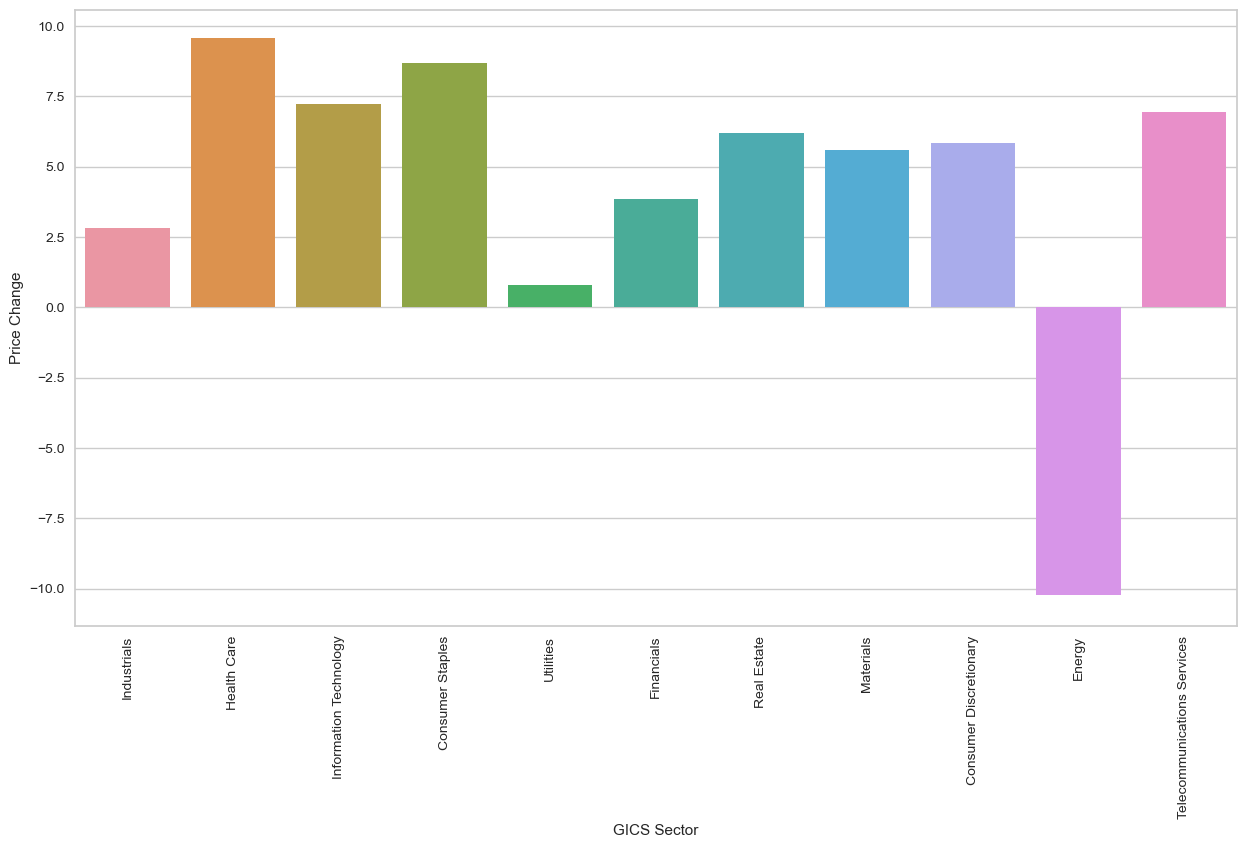

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS Sector", y="Price Change", ci=False)
plt.xticks(rotation=90)
plt.show()

- Health Care sector has the highest share price increase

**Q3: How are the different variables correlated with each other?**

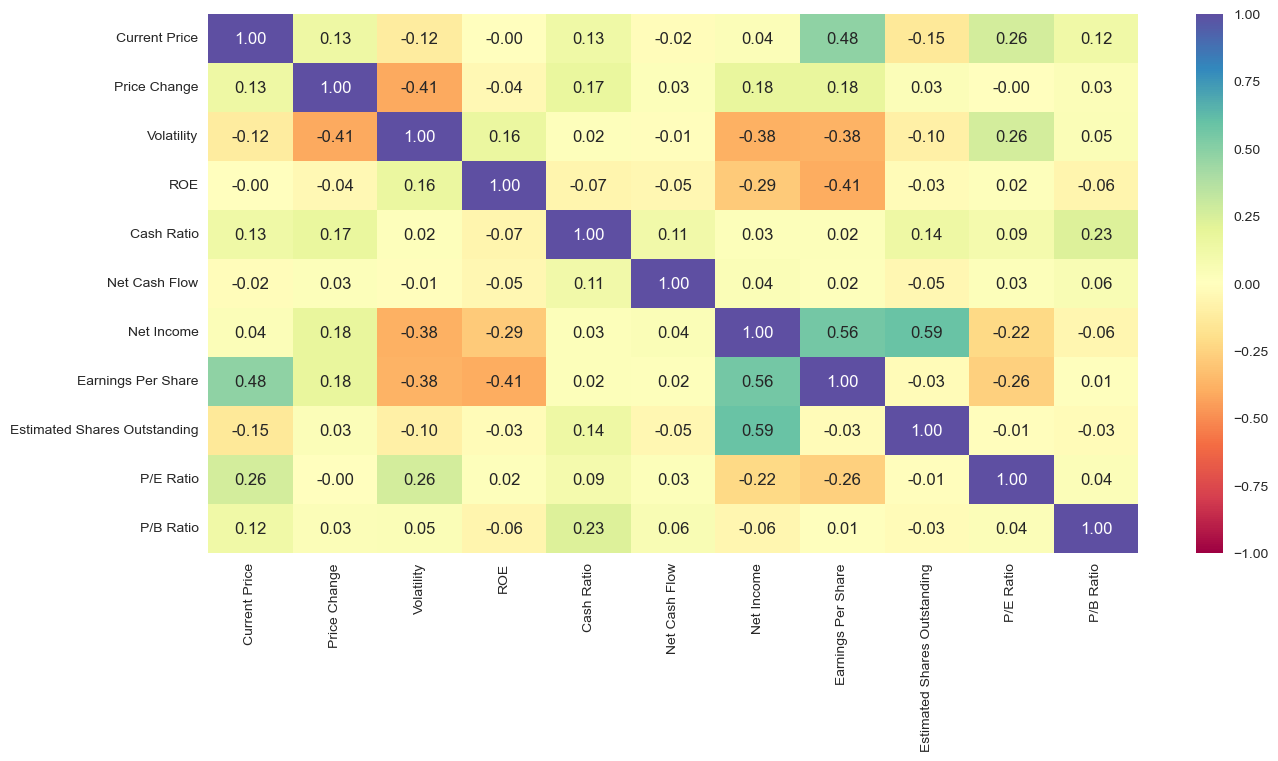

<IPython.core.display.Javascript object>

In [28]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- There are some strongly and weakly correlated variables
- Net Income with Estimated shares Outstanding and Earnings per share are strongly correlated followed by Earnings per share and Current price
- Volatility with Price change and Net income are weakly correlated

**Q4: Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

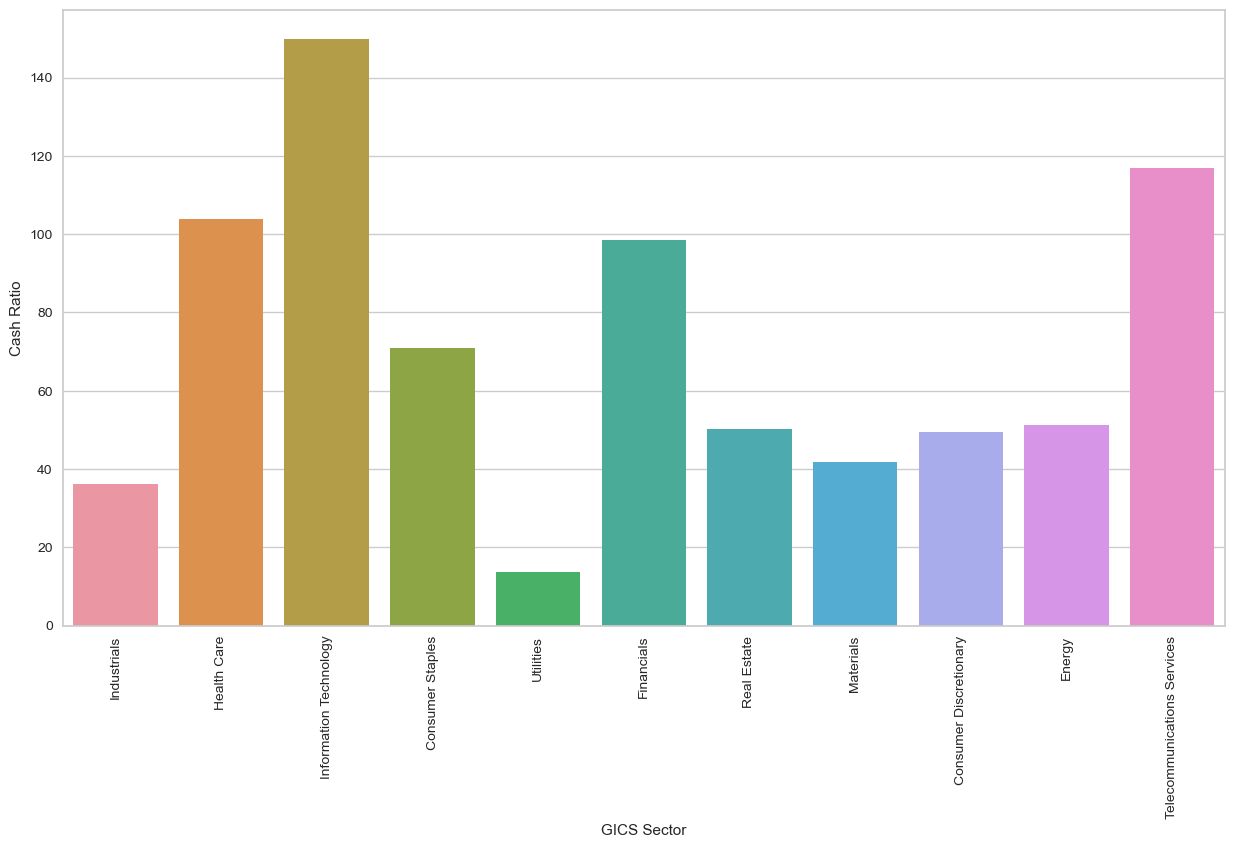

<IPython.core.display.Javascript object>

In [29]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS Sector", y="Cash Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

- Infomation Technology firms have the highest cash ratio followed by Telecommunication Services, as these services have daily to monthly cuustomers using their services
- Health Care and Financials follow suit

**Q5: P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

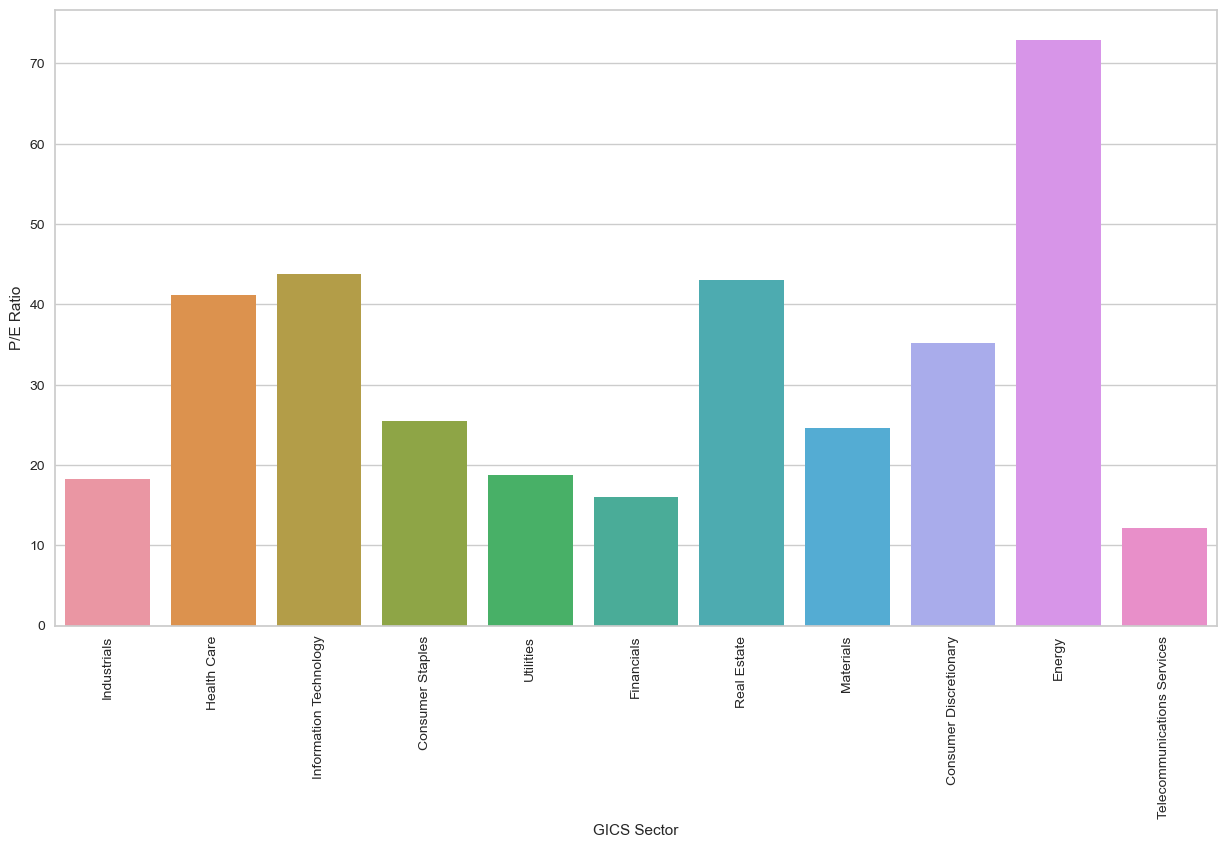

<IPython.core.display.Javascript object>

In [30]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS Sector", y="P/E Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

- The Energy sector has the highest P/E ratio, as this is the most used commodity in every sectors
- Infomation Technology and Real Estate also attracts investors


## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

**Outlier check**

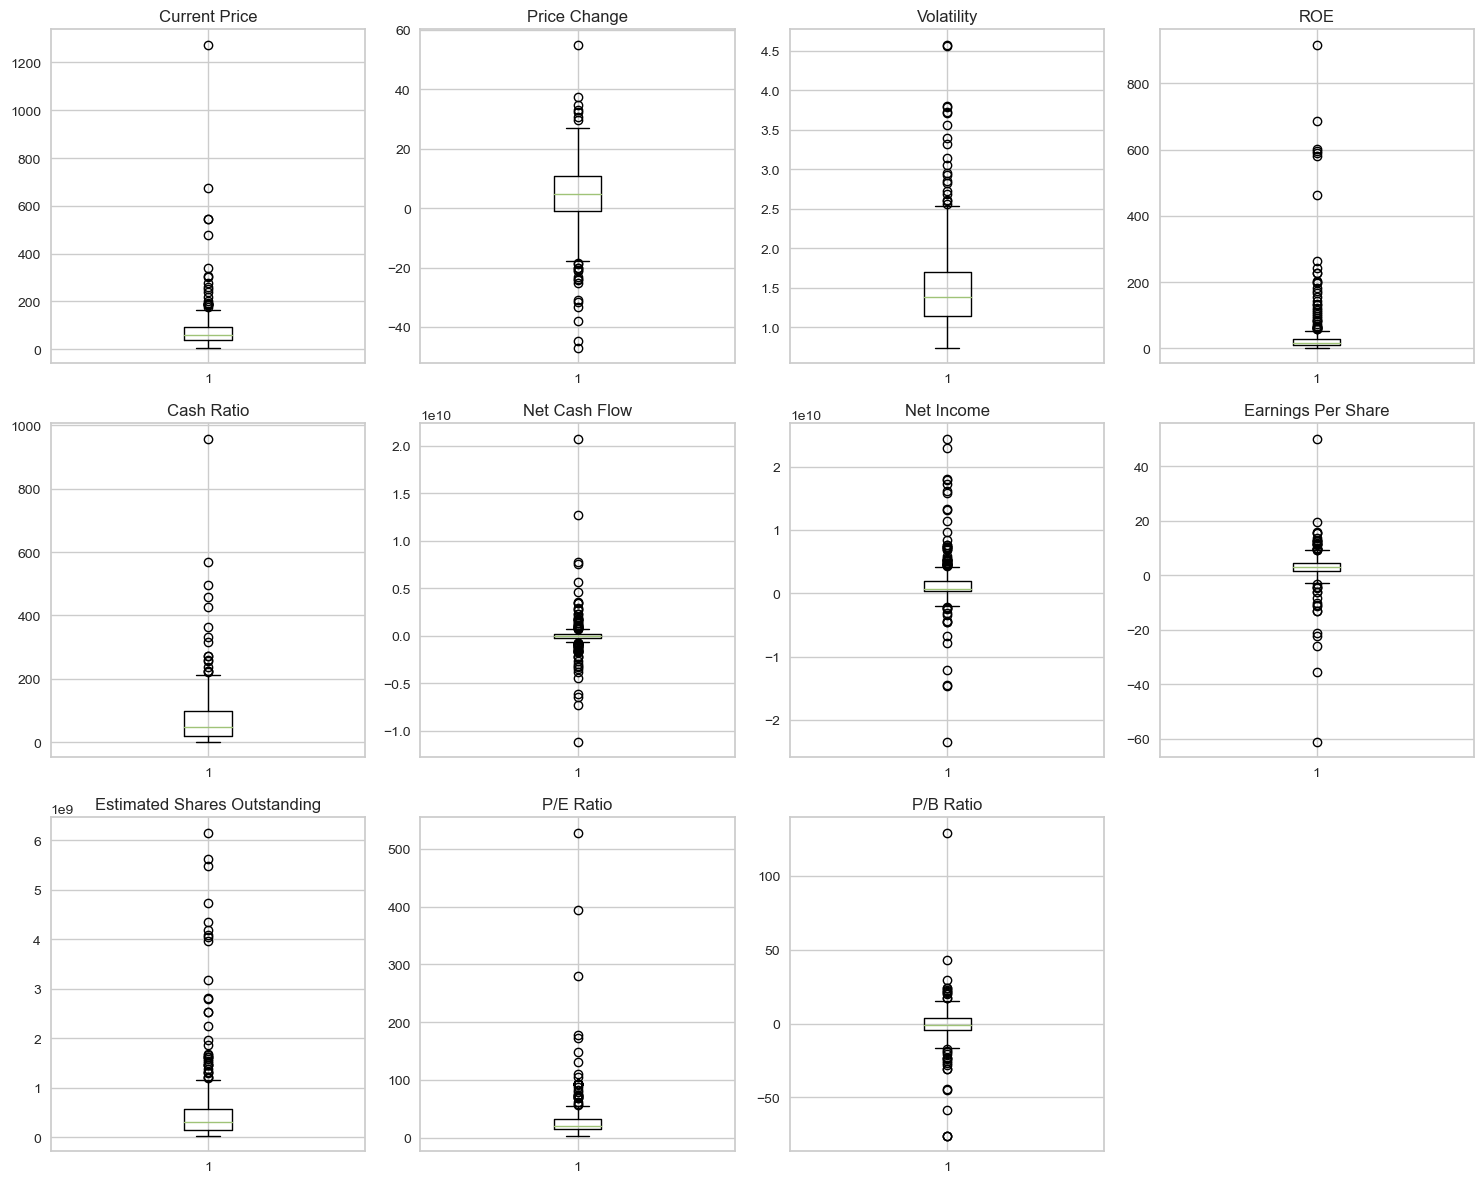

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are significant outliers in all variables

**Scaling dataset**

In [32]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [33]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

## K-means Clustering

In [34]:
k_means_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


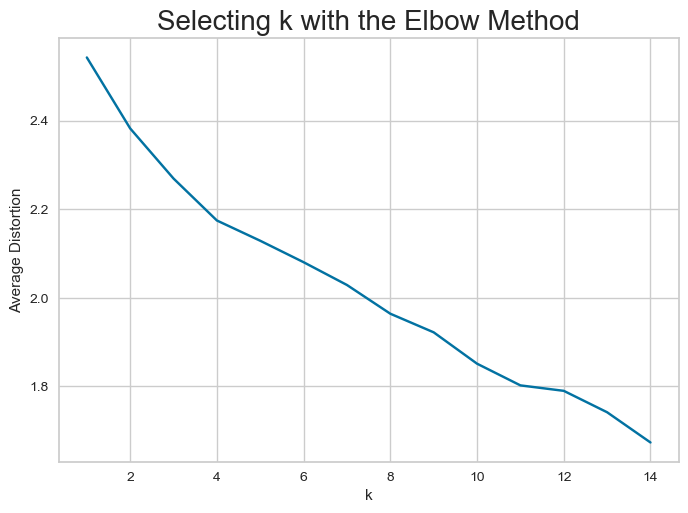

<IPython.core.display.Javascript object>

In [35]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

- K value is between 5 and 7

**Silhouette score**

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


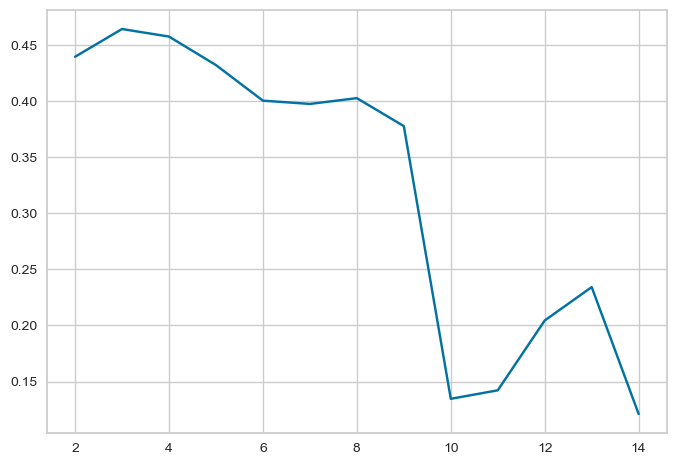

<IPython.core.display.Javascript object>

In [36]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

- From silhouette score we will use 5

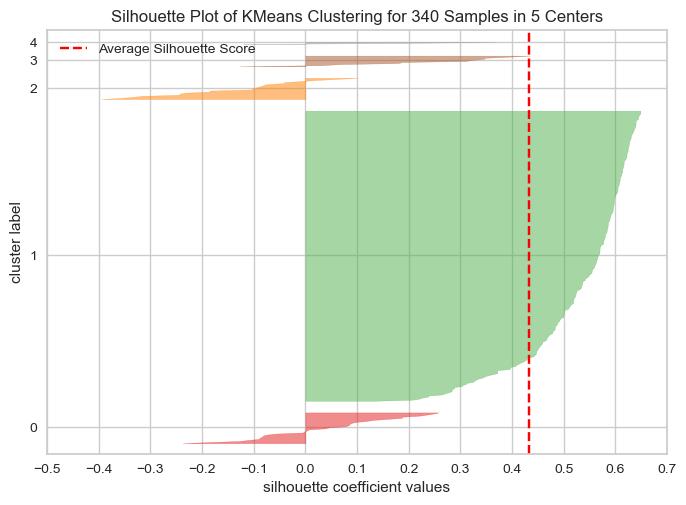

<IPython.core.display.Javascript object>

In [37]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

#### Final model

In [38]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=5, random_state=1)

<IPython.core.display.Javascript object>

In [39]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

#### Cluster profiling

In [40]:
km_cluster_profile = df1.groupby("KM_segments").mean()

<IPython.core.display.Javascript object>

In [41]:
km_cluster_profile["count_in_each_segments"] = (
    df1.groupby("KM_segments")["Security"].count().values
)

<IPython.core.display.Javascript object>

In [42]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
KM_segments,,,,,,,,,,,,
0,65.174668,-11.542247,2.690220,37.300000,65.366667,195008366.666667,-1677736033.333333,-4.401667,544473664.718000,113.488924,1.424161,30
1,72.738269,5.179897,1.380738,34.825455,53.138182,-10147287.272727,1488641570.909091,3.636164,437961614.918582,23.680917,-3.395254,275
2,233.251108,13.682869,1.719008,29.333333,296.523810,1398716380.952381,1835686380.952381,7.126190,508721791.962857,37.805996,16.758218,21
3,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
4,26.990000,-14.060688,3.296307,603.000000,57.333333,-585000000.000000,-17555666666.666668,-39.726667,481910081.666667,71.528835,1.638633,3


<IPython.core.display.Javascript object>

- Cluster 1 has most of the companies in this segment

In [43]:
## companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 1, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

<IPython.core.display.Javascript object>

In [44]:
df1.groupby(["KM_segments", "GICS Sector"])["Security"].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          1
             Energy                         21
             Health Care                     1
             Industrials                     1
             Information Technology          4
             Materials                       2
1            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      18
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
2            Consumer Discretionary          5
             Consumer Staples                1
             Financials                      1
             Health

<IPython.core.display.Javascript object>

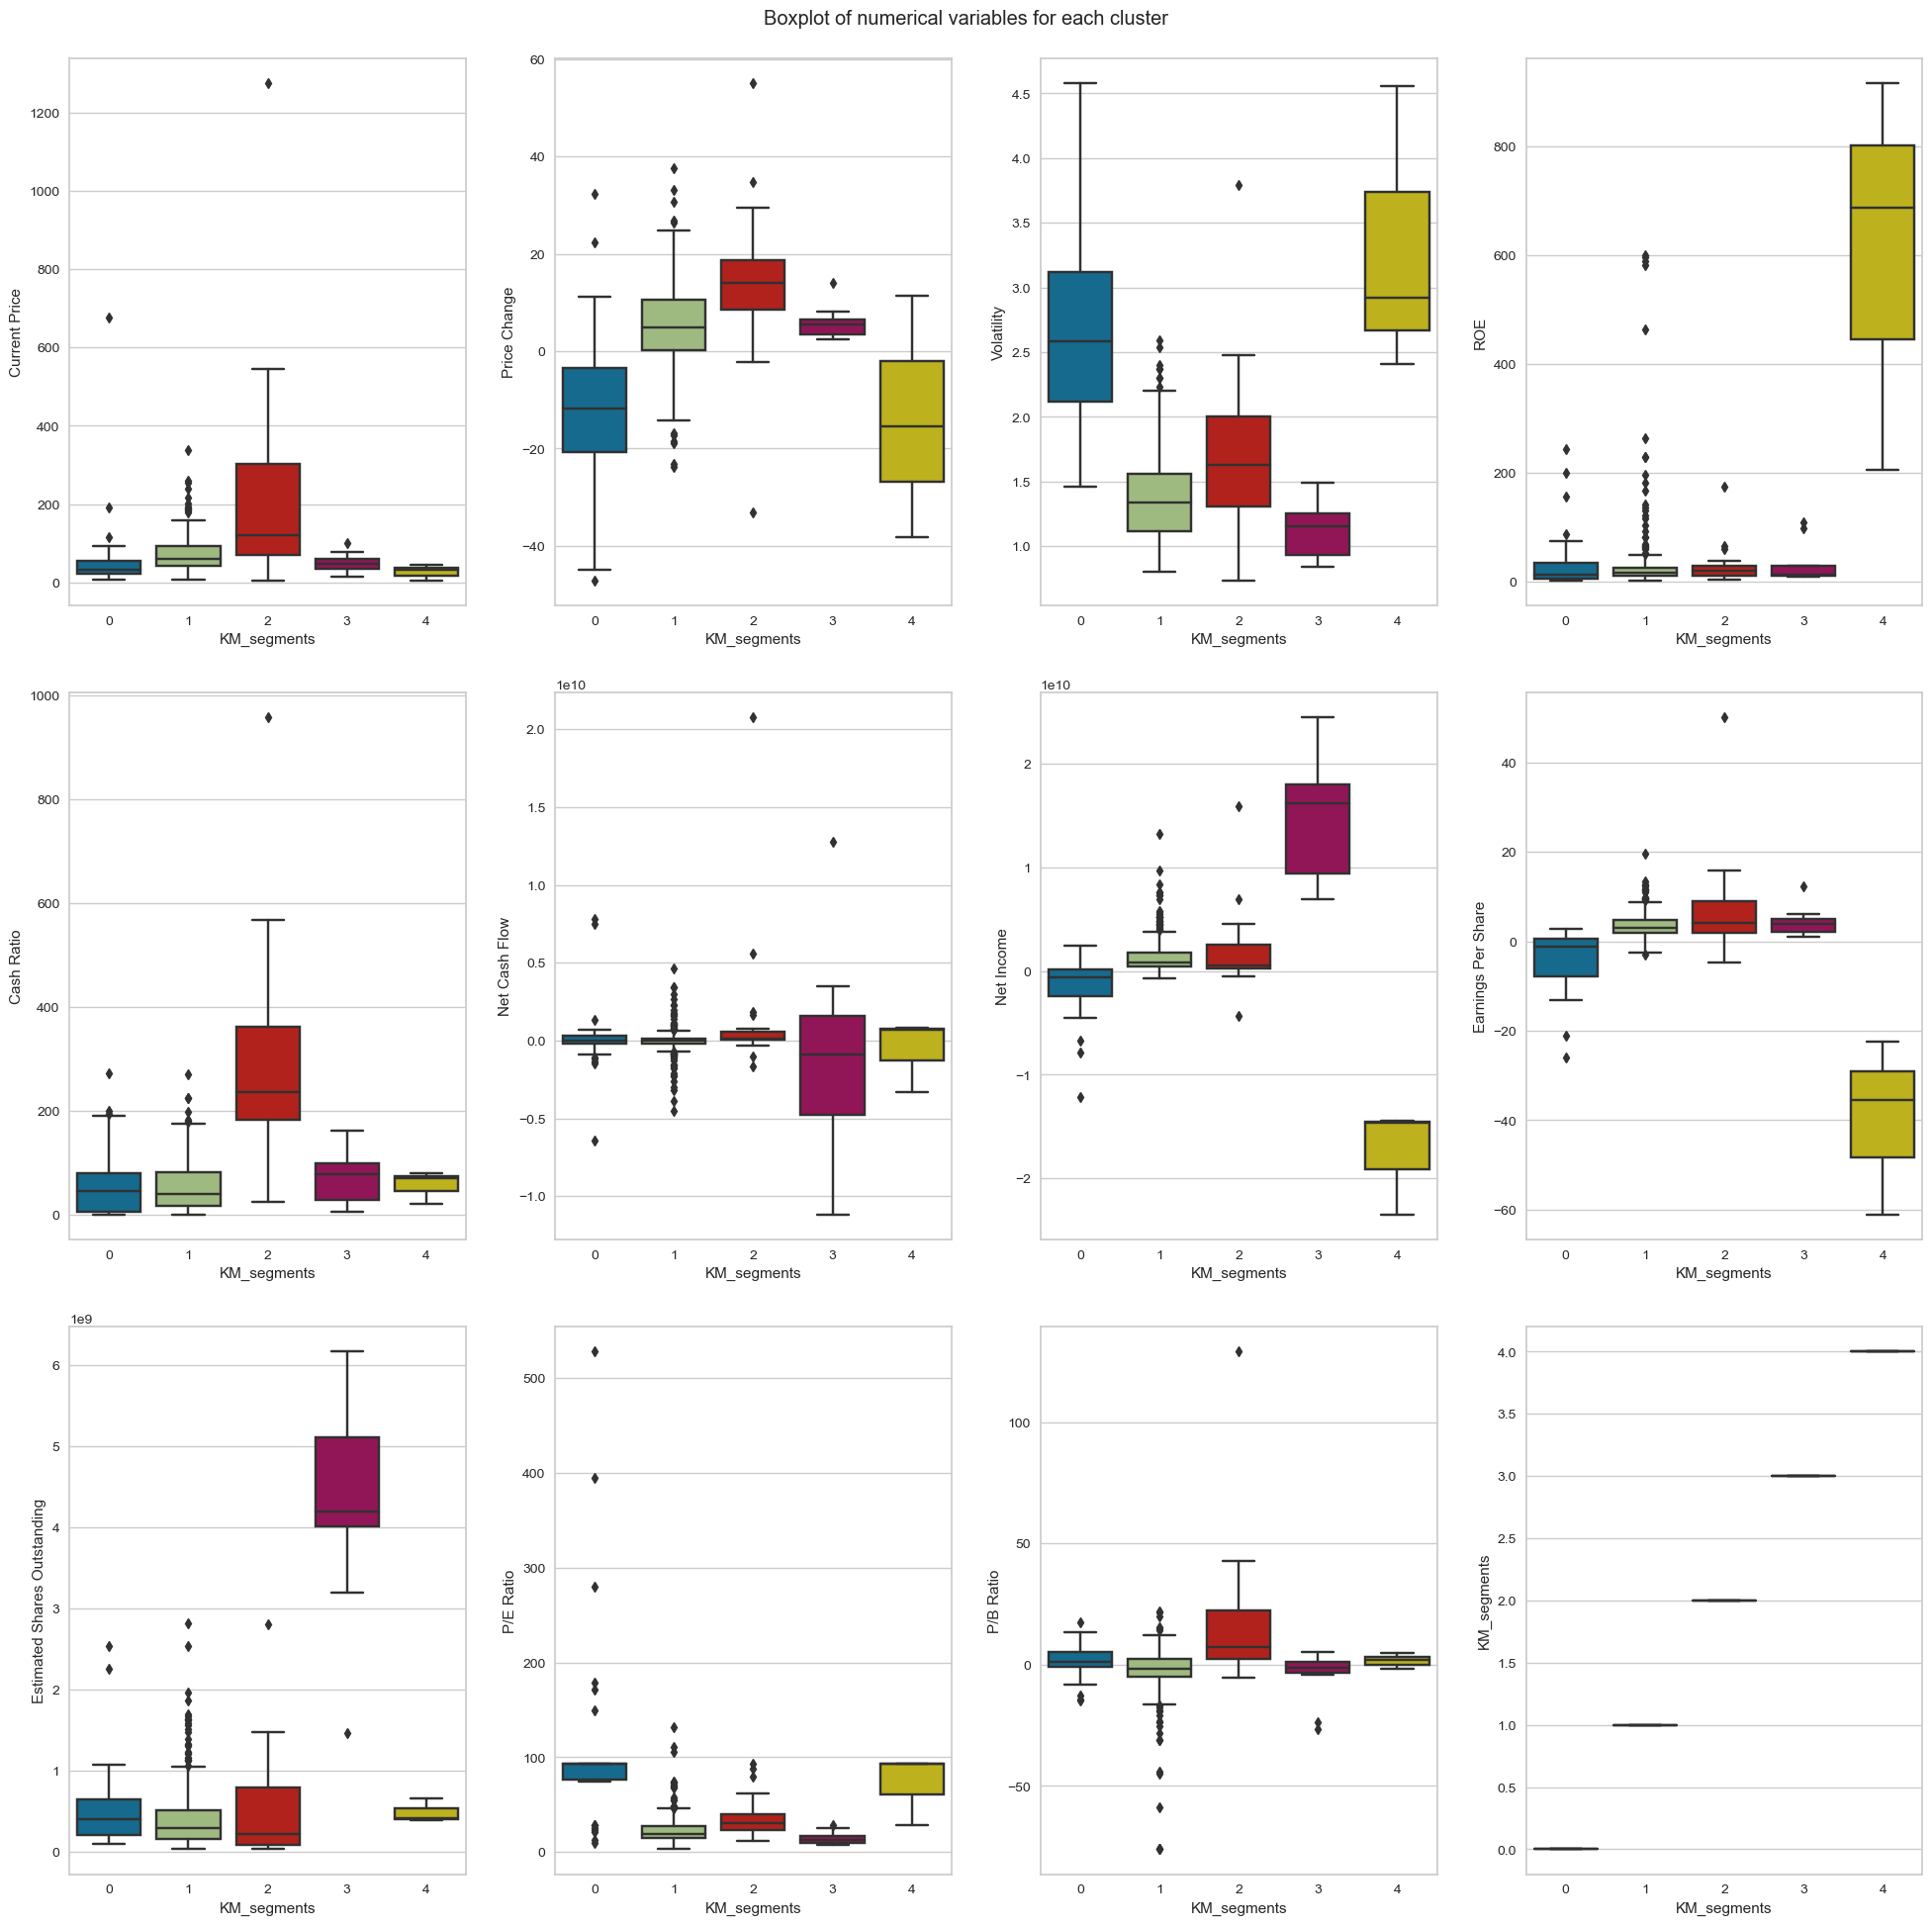

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df1.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Observation

- **Cluster 0**: *Risky Investments*
    - This cluster has mostly negative price changes which indicate some losses
    - it has more volatile price
    - Though they have the highest P/E
    - Make profits trading in this group is risky.
   
- **Cluster 1**: *Average Investments*
    - This cluster has some high ROE
    - The P/E and Earnings per share are all moderate
    - But P/B is the lowest
    
- **Cluster 2**: *Profitable Investments*
    - They have the highest Current prices, means the companies are mostly traded on
    - The have the highest positive price changes indicating gains
    - Also have the highest Cash ratio
    - Net cash flow is average with moderate Net Income
    - Has the highest Earnings per share and P/B ratio


- **Cluster 3**: *Moderate Investments*
    - They have a postive price changes with the lowest volatility
    - Also has the lowest ROE.
    - This cluster has the lowest Net cash flow but has the highest Net Income
    - They have moderate Earnings per share and Estimated shares outstanding 
    

- **Cluster 4**: *Low Profit Investments*
    - They have the lowest price with the highest volatility
    - They have the highest ROE and Cash ratio.
    - Though the Net cash flow is moderate with some gains and losses.
    - They have the lowest Net Income and Earnings per share
    - They have the least Estimated Shares Outstanding
    - Have minimal P/B ratio with good P/E

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [46]:
hc_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

In [47]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

<IPython.core.display.Javascript object>

In [48]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print("*" * 100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only.**

In [49]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


<IPython.core.display.Javascript object>

In [50]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


<IPython.core.display.Javascript object>

### Checking Dendrograms

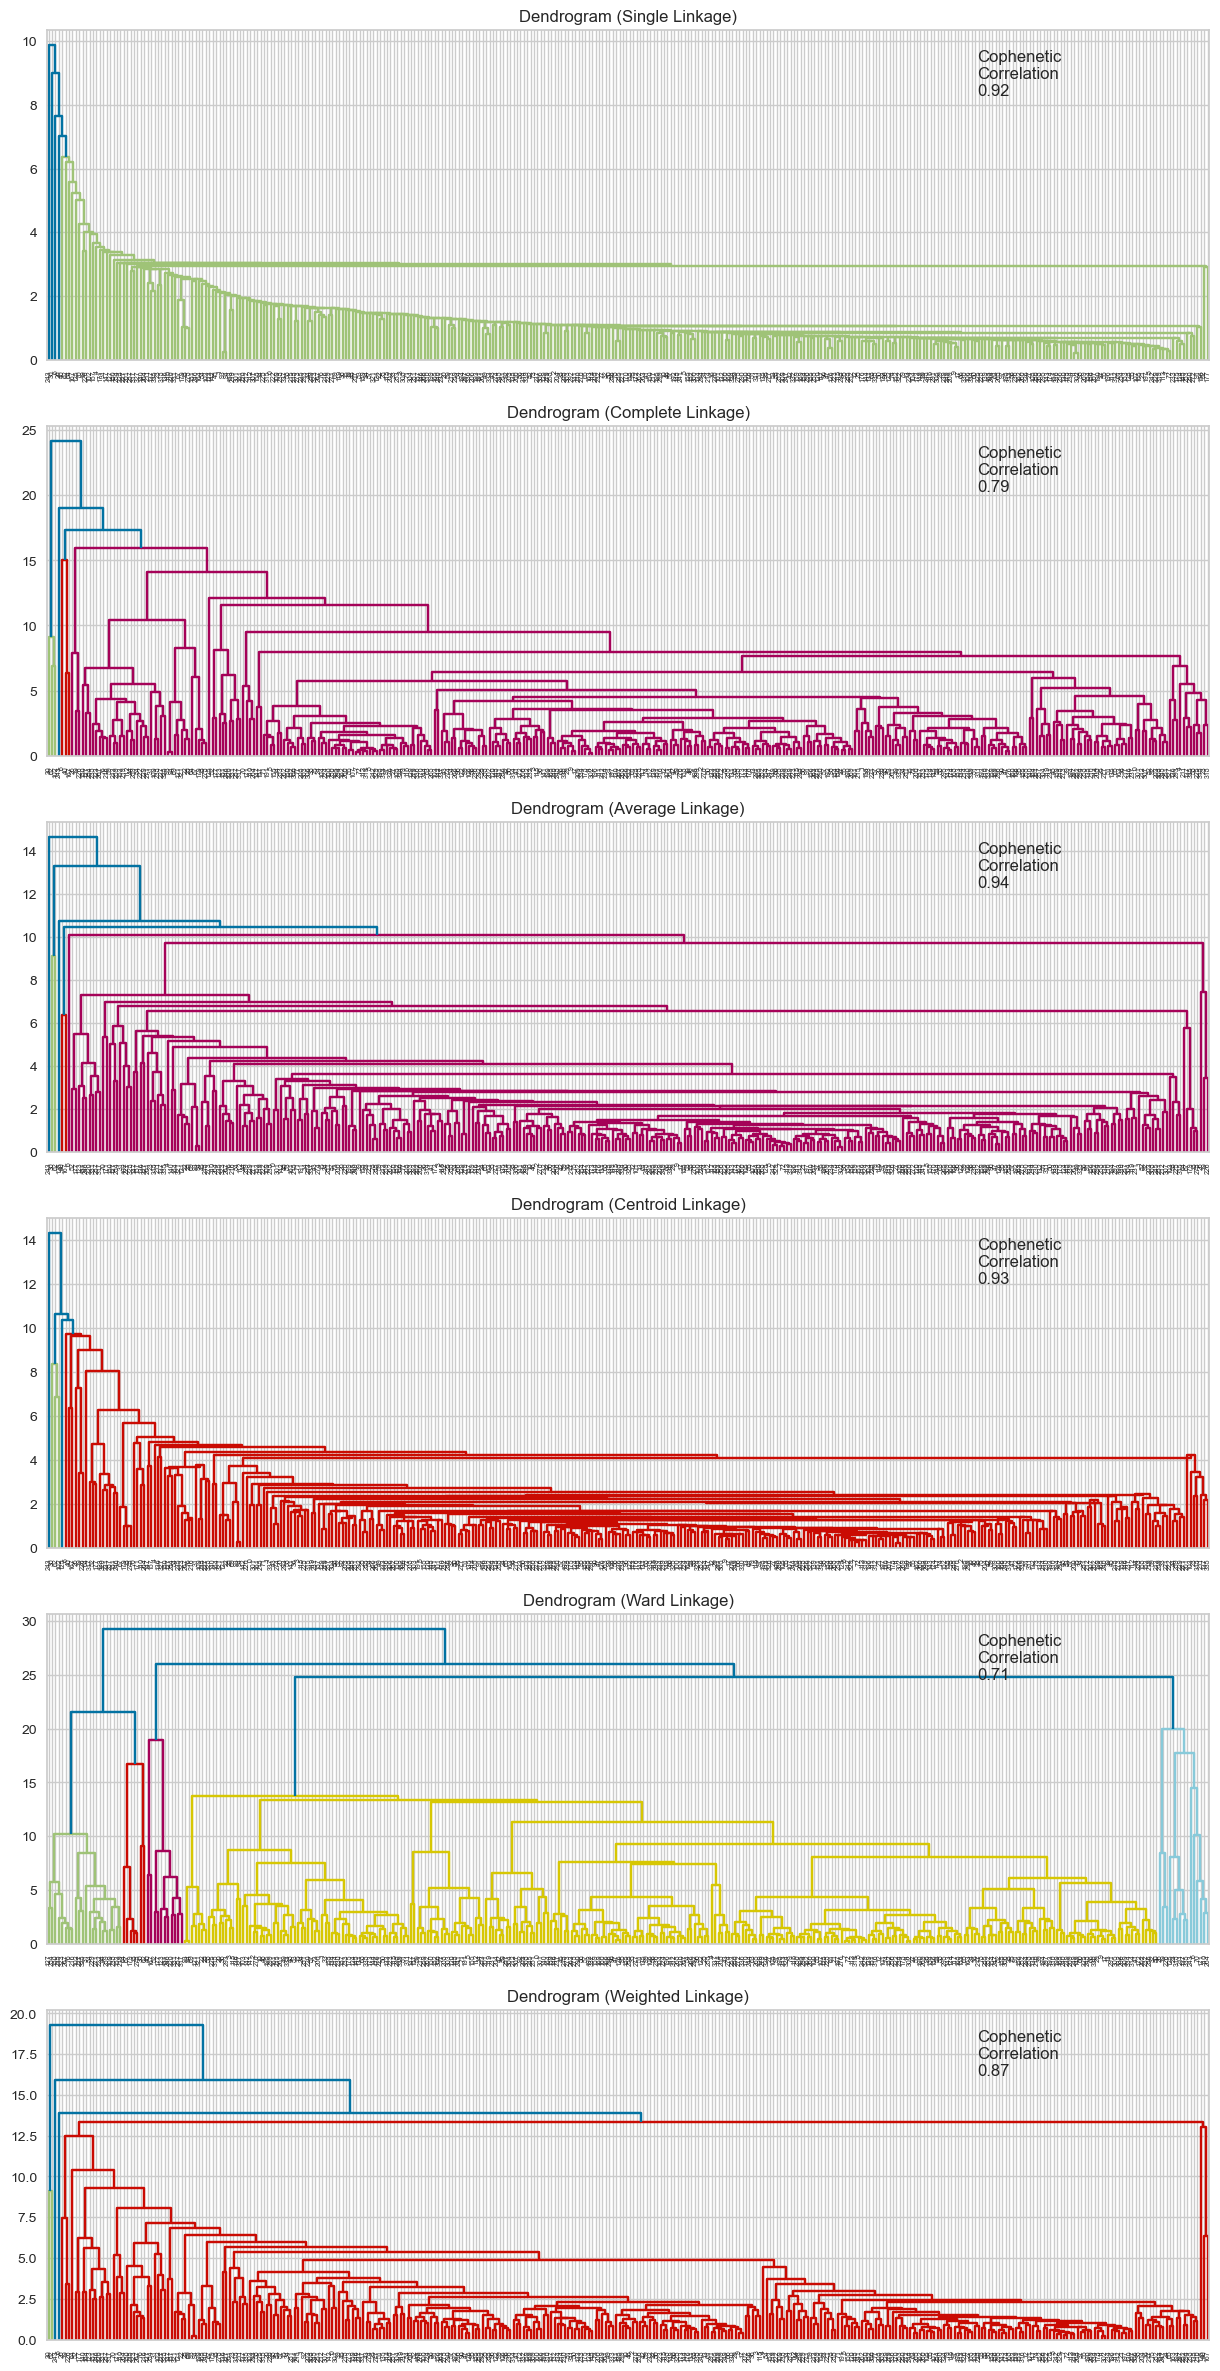

<IPython.core.display.Javascript object>

In [51]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**
- Average linkage gave a high cophenetic correlation but the clustering is not distinctive
- Ward linkage shows clear clustering of all variables
- We will choose 5 clusters, as it groups the companies better

### Creating model using sklearn

In [52]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=5)

<IPython.core.display.Javascript object>

In [53]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Clustering profile

In [54]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

<IPython.core.display.Javascript object>

In [55]:
hc_cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

<IPython.core.display.Javascript object>

In [56]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_segments,,,,,,,,,,,,
0,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22


<IPython.core.display.Javascript object>

- Cluster 3 has most of the companies in it

In [57]:
## companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

<IPython.core.display.Javascript object>

In [58]:
df2.groupby(["HC_segments", "GICS Sector"])["Security"].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy

<IPython.core.display.Javascript object>

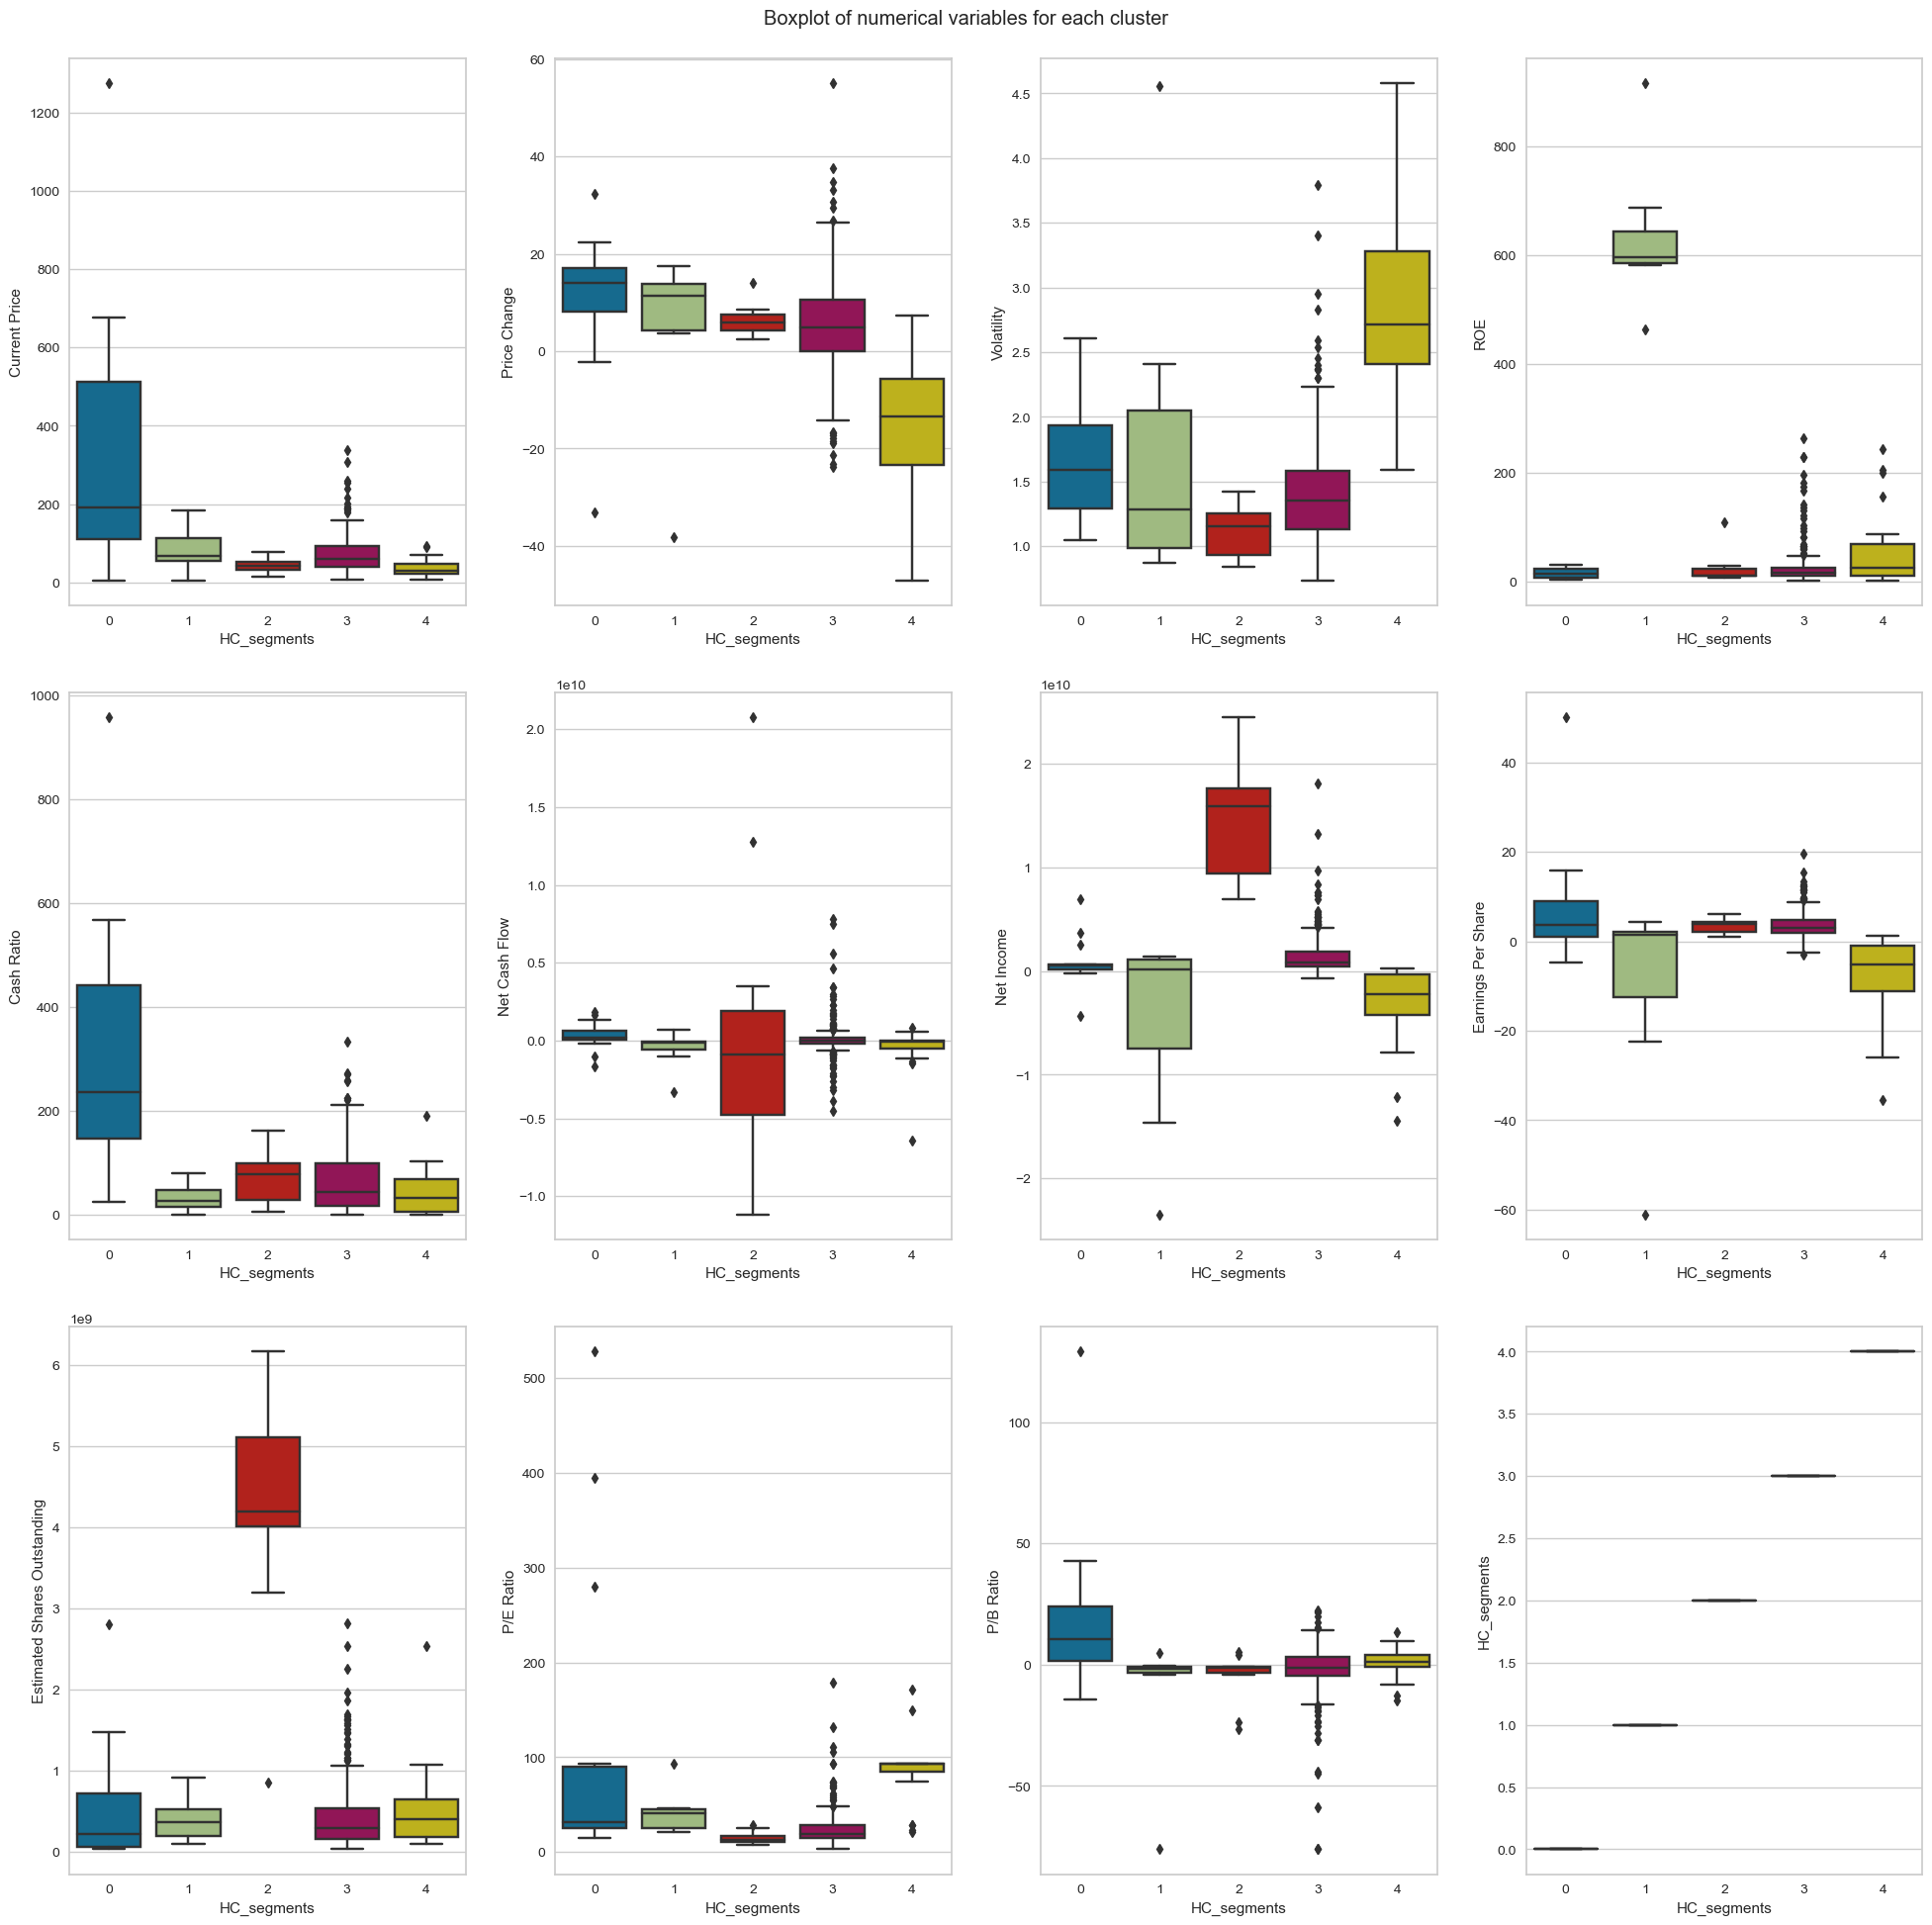

<IPython.core.display.Javascript object>

In [59]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df2.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

- **Cluster 0**: *Average Investments*
    - This cluster has the highest current price
    - They have the least ROE with some extreme positive and negative price change.
    - They have the highest cash ratio
    - Also have the most positve P/E and P/B ratio
   
- **Cluster 1**: *Low Returns Investments*
    - This cluster has the most positive Price changes
    - Has the highest ROE with the lowest Cash ratio
    - They have the most negative Net Income with low earnings per share
    
- **Cluster 2**: *Profitable Investments*
    - They have the most positive Earnings per share
    - With some positive and negative P/B ratio
    - They are the least volatile
    - Net cash flow ranges from the maximum positve and negative values
    - They have the highest Net Income


- **Cluster 3**: *Average Investments*
    - Net Income is average
    - Mostly negative P/B ratio
    

- **Cluster 4**: *Risky Investments*
    - They have the lowest Current price
    - The most volatile market
    - Mostly loses in Earnings per share but with the highest P/E ratio
    - Has the lowest Price changes

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

**Observations**

- Hierarchial Clustering took some time in execution
- Both Hierarchial and K-means clustering showed 5 clusters as the best clustering
- Each clustering techniques gave slightly the same high clustering group of cluster 3 having 285 for Hierarchical and cluster 1 having 275 for K-means**
- The Cluster profiles in both  Clustering methods are slightly the same groupings
- Both have a protibale to risky investments
- K-means gave a more detailed clustering than Hierarchial clustering


## Actionable Insights and Recommendations

**Using K-Means Clustering**

- Cluster 2 (Profitable Investments) companies should be more invested in as this gives higher returns on investment though price is significantly high
- For those who want very high profit with risk should invest in Cluster 0 (Risky Investments)
- For an average steady investments, Clusters 1 (Average Investments) and Clusters 3 (Moderate Investments) should be concerned
- Cluster 4 (Low profit Investments) should be avoided as returns are minimal
- As most of the companies where grouped in Cluster 1, profits from this group are average
